# TAREA NO. 2 - Estadística Multivariada

## Explicación de la base de datos:

El World Happiness Report evalúa el bienestar de los países en base a varios factores, utilizando distintas métricas que ayudan a explicar los niveles de felicidad de la población. A continuación te explico a qué se refiere cada una de las características de esta base de datos:

- Country name (Nombre del país): Se refiere al nombre oficial del país que está siendo evaluado en el reporte.

- Year (Año): Es el año en el que se recolectaron los datos o se realizó el análisis para el reporte.

- Life Ladder (Escalera de la vida): Este es un indicador de bienestar subjetivo, en el cual se pide a las personas que califiquen su vida en una escala del 0 (la peor vida posible) al 10 (la mejor vida posible) según su propia percepción.

- Log GDP per capita (Logaritmo del PIB per cápita): Representa el logaritmo del Producto Interno Bruto (PIB) per cápita ajustado por poder adquisitivo. El PIB per cápita es una medida del nivel de vida en un país. El logaritmo se usa para escalar los datos y manejar mejor las diferencias entre los países.

- Social support (Apoyo social): Se refiere a la percepción de las personas sobre si tienen o no a alguien en quien puedan confiar en momentos de necesidad. Es un indicador de la red de apoyo social que tienen los individuos.

- Healthy life expectancy at birth (Esperanza de vida saludable al nacer): Estima cuántos años se espera que una persona viva con buena salud desde su nacimiento. Este indicador combina la longevidad con la calidad de vida en términos de salud.

- Freedom to make life choices (Libertad para tomar decisiones de vida): Mide la percepción de las personas sobre su libertad para tomar decisiones importantes en sus vidas, como elegir su ocupación, lugar de residencia, entre otros.

- Generosity (Generosidad): Este indicador evalúa la disposición de las personas a donar dinero o ayudar a los demás, basándose en la cantidad de actos altruistas reportados por los encuestados.

- Perceptions of corruption (Percepciones de corrupción): Mide la percepción de la corrupción en el gobierno y las instituciones empresariales dentro del país. Un valor alto indica una mayor percepción de corrupción.

- Positive affect (Afecto positivo): Representa la frecuencia con la que las personas experimentan emociones positivas como felicidad, risa y disfrute en su vida diaria.

- Negative affect (Afecto negativo): Refleja la frecuencia con la que las personas experimentan emociones negativas como el estrés, la tristeza y el enojo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import mahalanobis
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler

## 1. Cargar los datos

### 1.1. Cargar los datos desde el entorno local

In [2]:
df = pd.read_csv("world-happiness-report.csv")
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


### 1.2. Filtrar los datos y obtener la información de interés

Ya que la base de datos tiene más de 1000 observaciones y se quiere es hacer una análisis que permita observar el dendograma, se va a filtrar la base de datos por países, donde se va a restringir el análisis para Colombia, como se muestra a continuación, resultando en solo 15  observaciones que se pueden observar fácil gráficamente.

In [3]:
# Filtrar solo a el pais 'Colombia'
df_colombia = df[df['Country name'] == 'Colombia']
df_colombia.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
357,Colombia,2006,6.025,9.277,0.910,65.22,0.805,-0.015,0.808,0.800,0.326
358,Colombia,2007,6.138,9.330,0.894,65.34,0.786,-0.040,0.860,0.808,0.287
359,Colombia,2008,6.168,9.351,0.880,65.46,0.795,-0.042,0.763,0.803,0.307
360,Colombia,2009,6.272,9.351,0.886,65.58,0.757,-0.055,0.837,0.843,0.273
361,Colombia,2010,6.408,9.384,0.893,65.70,0.816,-0.050,0.815,0.831,0.265


En este caso, las variables categóricas como PAIS y AÑO no van a ir dentro del análisis de clúster ya que no brindan información relevante. PAIS siempre es el mismo entonces no aporta nada, por otro lado, el año será la etiqueta de los datos, permitiendo agrupar las observaciones y ver en que años, en Colombia, hay mayor similitud en cuanto a la felicidad de las personas.

In [4]:
etiquetas = df_colombia['year'] # Etiquetas para los datos

df = df_colombia[['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 
        'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']] # Seleccionar las columnas a usar
df.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
357,6.025,9.277,0.910,65.22,0.805,-0.015,0.808
358,6.138,9.330,0.894,65.34,0.786,-0.040,0.860
359,6.168,9.351,0.880,65.46,0.795,-0.042,0.763
360,6.272,9.351,0.886,65.58,0.757,-0.055,0.837
361,6.408,9.384,0.893,65.70,0.816,-0.050,0.815


In [5]:
# Calcular la cantidad de valores nulos en cada columna
pd.DataFrame.isnull(df).sum()

Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
dtype: int64

In [6]:
# Imputar los valores nulos con la media de la columna
# df = df.fillna(df.mean()) # Descomentar para imputar valores nulos (si los hay)

In [7]:
X = df.values
y = etiquetas.values
print("Las dimensiones de X son: ", X.shape)
print("Las dimensiones de y son: ", y.shape)

Las dimensiones de X son:  (15, 7)
Las dimensiones de y son:  (15,)


In [8]:
print("Las medias de cada columna son: ", np.mean(X, axis=0))
print("Las desviaciones estándar de cada columna son: ", np.std(X, axis=0))

Las medias de cada columna son:  [ 6.24853333  9.46933333  0.8874     66.50666667  0.81446667 -0.08046667
  0.84773333]
Las desviaciones estándar de cada columna son:  [0.21987356 0.10283104 0.02750224 0.97410928 0.02481093 0.04754207
 0.03609149]


### 1.3. Estandarizado de los datos

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
print("La media de cada variable es: ", X_scaled.mean(axis=0))
print("La desviación estándar de cada variable es: ", X_scaled.std(axis=0))

La media de cada variable es:  [ 7.54951657e-15  3.54346182e-15 -2.13162821e-15 -8.85217825e-15
  4.15963560e-15 -2.29446092e-16 -2.07241631e-16]
La desviación estándar de cada variable es:  [1. 1. 1. 1. 1. 1. 1.]


Los datos han sido estandarizados, lo que es esencial para realizar el análisis de clúster ya que las variables están en diferentes escalas. A continuación, realizaremos un análisis de clúster jerárquico utilizando distintas medidas de distancia y técnicas de aglomeración. Evaluaremos las siguientes combinaciones:

### 1.4. Definición de los métodos que se van a usar

Para cambiar las métricas de distancia, simplemente modifica el parámetro metric dentro de pdist. Aquí algunos ejemplos:

- Para distancia Euclidiana: pdist(X, metric='euclidean')
- Para distancia Manhattan: pdist(X, metric='cityblock')
- Para distancia Chebyshev: pdist(X, metric='chebyshev')
- Para distancia Coseno: pdist(X, metric='cosine')
- Para distancia Mahalanobis: pdist(X, metric='mahalanobis', VI=matriz_inversa_de_covarianza)

In [11]:
distancias = ["euclidean", "cityblock", "chebyshev", "cosine", "mahalanobis"]

In [12]:
metodos = ["single", "complete", "average", "weighted", "centroid", "median", "ward"]

## 2. Análisis de clúster jerárquico

### 2.1. Calculo del coeficiente cofenético

In [13]:
# Calcular la matriz inversa de la covarianza para la distancia de Mahalanobis
VI = np.linalg.inv(np.cov(X_scaled.T))

In [14]:
cofenetic_results = pd.DataFrame(columns=metodos, index=distancias)
# Calcular los coeficientes cofenéticos para cada combinación de distancia y método de aglomeración
for distance_metric in distancias:
    for linkage_method in metodos:
        try:
            # Si la distancia es Mahalanobis, usamos una función especial
            if distance_metric == 'mahalanobis':
                distance_matrix = pdist(X_scaled, metric=mahalanobis, VI=VI)
            else:
                distance_matrix = pdist(X_scaled, metric=distance_metric)
            
            # Realizar el clustering jerárquico
            linkage_matrix = linkage(distance_matrix, method=linkage_method)
            
            # Calcular el coeficiente cofenético
            coph_d, coph_matrix = cophenet(linkage_matrix, distance_matrix)
            cofenetic_results.loc[distance_metric, linkage_method] = coph_d
        except Exception as e:
            # Guardamos los errores para combinaciones que fallan
            cofenetic_results.loc[distance_metric, linkage_method] = str(e)

# Redondear los resultados a 2 decimales
cofenetic_results

,single,complete,average,weighted,centroid,median,ward
euclidean,0.667191,0.717077,0.799454,0.788883,0.793234,0.78735,0.678028
cityblock,0.629001,0.692561,0.777995,0.769904,0.77351,0.744112,0.683192
chebyshev,0.65248,0.700134,0.77635,0.771996,0.752932,0.756324,0.642536
cosine,0.710527,0.749192,0.756198,0.75494,0.754469,0.74914,0.746852
mahalanobis,0.638189,0.629753,0.731875,0.720894,0.694704,0.642234,0.549889


In [15]:
# Calcular la media de los coeficientes cofenéticos segun la distancia
cofenetic_results.mean(axis=1)

euclidean      0.747317
cityblock      0.724325
chebyshev      0.721822
cosine         0.745903
mahalanobis     0.65822
dtype: object

### 2.2. Extracción de al mejor diatancia y mejor método de enlace

In [16]:
# Extraer el mejor y peor coeficiente cofenético para cada distancia y método
cofenetic_results = cofenetic_results.astype(float)
best_cophenetic = cofenetic_results.max().max()
worst_cophenetic = cofenetic_results.min().min()

# Encontrar la mejor combinación de distancia y método
best_combination = cofenetic_results.stack()[cofenetic_results.stack() == best_cophenetic].index[0]
worst_combination = cofenetic_results.stack()[cofenetic_results.stack() == worst_cophenetic].index[0]

print("El mejor coeficiente cofenético es: ", best_cophenetic)
print("El peor coeficiente cofenético es: ", worst_cophenetic)
print("La mejor combinación de distancia y método es: ", best_combination)
print("La peor combinación de distancia y método es: ", worst_combination)

El mejor coeficiente cofenético es:  0.7994536676891434
El peor coeficiente cofenético es:  0.5498890106333905
La mejor combinación de distancia y método es:  ('euclidean', 'average')
La peor combinación de distancia y método es:  ('mahalanobis', 'ward')


El coeficiente cofenético mide qué tan bien la estructura jerárquica preserva las distancias originales. Un valor cercano a 1 indica una mejor preservación.

La mejor combinación fue Euclidean + Average con un coeficiente de ~0.8. Mientras que la peor combinación fue la de Mahalanobis + Ward con un coeficiente de tan solo ~0.55.

Los métodos con la distancia Mahalanobis presentaron los coeficientes más bajos en promedio, lo que indica que no es la mejor elección para este conjunto de datos. Mientras que, en promedio nuevamente, la distancia Euclidiana dio los mejores resultados. Estos resultados son consecuentes con los resultados anteriores de la mejor y peor combinación de distancia y método.
Por lo tanto, procederemos a interpretar los clústeres utilizando la combinación con mejor coeficiente: Euclidean + Average.

### 2.3. Dendograma

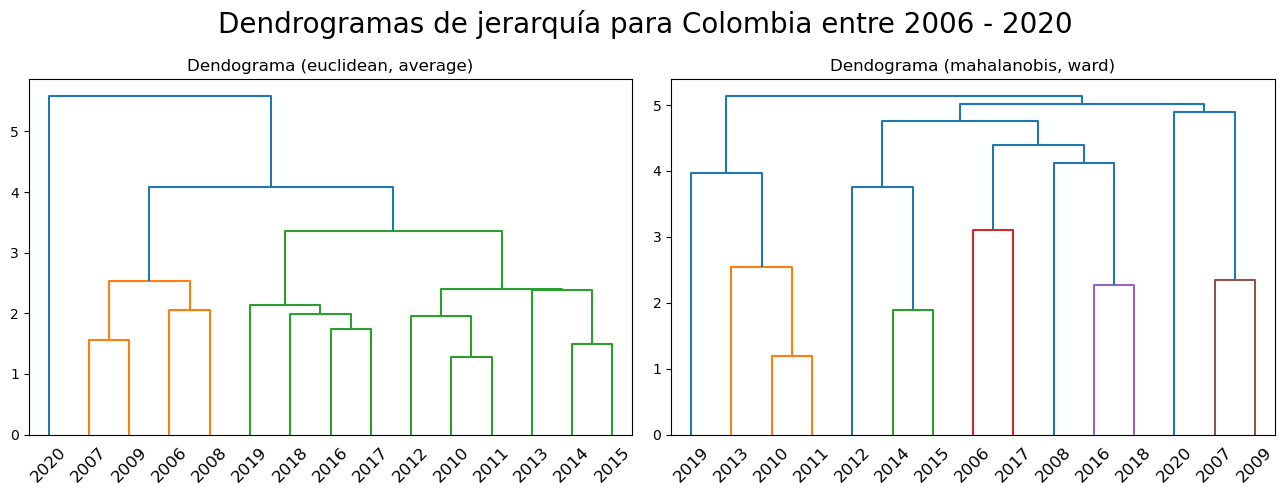

In [17]:
best_distance, best_method = best_combination
best_distance_matrix = pdist(X_scaled, metric=best_distance)
best_linkage_matrix = linkage(best_distance_matrix, method=best_method)

worst_distance, worst_method = worst_combination
worst_distance_matrix = pdist(X_scaled, metric=worst_distance)
worst_linkage_matrix = linkage(worst_distance_matrix, method=worst_method)

fig, axs = plt.subplots(1, 2, figsize=(13, 5))

fig.suptitle("Dendrogramas de jerarquía para Colombia entre 2006 - 2020", fontsize=20)

dendrogram(best_linkage_matrix, labels=y, ax=axs[0], leaf_rotation=45)
axs[0].set_title(f"Dendograma ({best_distance}, {best_method})")

dendrogram(worst_linkage_matrix, labels=y, ax=axs[1], leaf_rotation=45)
axs[1].set_title(f"Dendograma ({worst_distance}, {worst_method})")

plt.tight_layout()
plt.show()